In [210]:
conda install numpy scipy joblib scikit-learn --force-reinstall


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\USER\Documents\PythonRobotics

  added / updated specs:
    - joblib
    - numpy
    - scikit-learn
    - scipy



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [211]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# EXPLORING AND VISUALIZING MY DATASET

In [212]:
!pip install requests

In [213]:
>>> import pandas as pd
>>> members = pd.read_csv("members.csv")
>>> type(members)

members.head()

,UNIQUE ID,FIRST NAME,LAST NAME,GENDER,AGE,EMAIL,PHONE NUMBER,ADDRESS,BIRTHDAY,YEARLY ATTENDANCE,PERFORMANCE SCORE,STATUS
0,101,OLUWATOBI,PRINCESS OLORUNSHOLA,Female,Woman,@TOBIDOUNSHOLA1@GMAIL.COM,8080375855,"PLOT 14,PENTAGON ESTATE,RUMUOKWUSHI",27-04,2000,0,1
1,102,Abasiama,Ikpima,Female,Youth,abasiama@gmail.com,8066792966,no 15 candi eke street. Woji port harcourt,2/8/2019,2000,0,1
2,103,ADUMI,OKOLIE,Male,Man,adimaua.okolie2@gmail.com,9086573297,"YENAGOA,BAYELSA",16-08,1000,0,1
3,104,ADOILI,ADOKI,Male,Man,adoiliadoki@gmail.com,8112094704,NO 13 EWAA ST OFF ELEKAHIA ROAD.,30-10,3000,0,1
4,105,ARIEL,IKONNE,Male,Man,airelikonne@gmail.com,8118642305,IGWURUTA,12-Dec,1000,0,1


In [214]:
>>> pd.set_option("display.max.columns", None)

In [215]:
>>> pd.set_option("display.precision", 2)

In [216]:
>>> members.tail()

,UNIQUE ID,FIRST NAME,LAST NAME,GENDER,AGE,EMAIL,PHONE NUMBER,ADDRESS,BIRTHDAY,YEARLY ATTENDANCE,PERFORMANCE SCORE,STATUS
552,684,JUSTIN,ORJIUGO,Male,Man,Empty,7058924381,RUMUOMASI,8TH JUNE,6000,1,10
553,685,TEEKAY,JACK,Male,Man,Empty,8037286831,ALAKAHIA,10TH MARCH,6000,1,10
554,686,UGO,VICTORIA,Female,Woman,Empty,8167595136,RUMUOLUMNI,20TH MAY,6111,1,10
555,687,RUKKY,Empty,Female,Woman,Empty,8104113698,RUMUOLUMNI,12TH DECEMBER,6111,1,10
556,688,UYIME,ENO,Female,Woman,Empty,7061542593,NKPOLU,26TH FEB,6000,1,10


In [217]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UNIQUE ID          557 non-null    int64 
 1   FIRST NAME         557 non-null    object
 2   LAST NAME          557 non-null    object
 3   GENDER             557 non-null    object
 4   AGE                557 non-null    object
 5   EMAIL              557 non-null    object
 6   PHONE NUMBER       557 non-null    object
 7   ADDRESS            557 non-null    object
 8   BIRTHDAY           557 non-null    object
 9   YEARLY ATTENDANCE  557 non-null    int64 
 10  PERFORMANCE SCORE  557 non-null    int64 
 11  STATUS             557 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 52.3+ KB


In [218]:
members.describe()

,UNIQUE ID,YEARLY ATTENDANCE,PERFORMANCE SCORE,STATUS
count,557.00,557.00,557.00,557.00
mean,396.56,4116.94,0.27,3.46
std,171.29,2443.59,0.45,4.01
min,101.00,200.00,0.00,1.00
25%,249.00,2111.00,0.00,1.00
50%,400.00,4000.00,0.00,1.00
75%,546.00,5111.00,1.00,10.00
max,688.00,15550.00,1.00,10.00


Saving figure attribute_histogram_plots


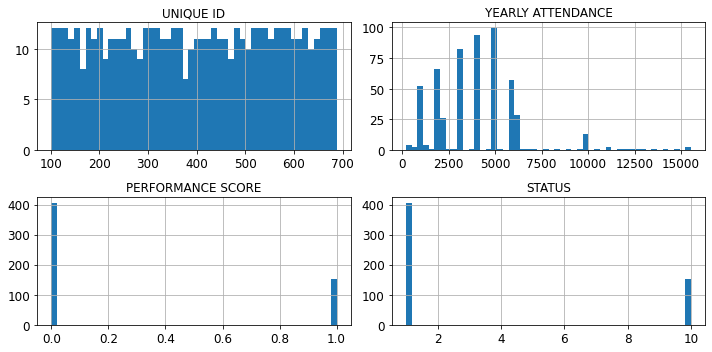

In [219]:
%matplotlib inline
import matplotlib.pyplot as plt
members.hist(bins=50, figsize=(10,5))
save_fig("attribute_histogram_plots")
plt.show()

<AxesSubplot:xlabel='YEARLY ATTENDANCE', ylabel='PERFORMANCE SCORE'>

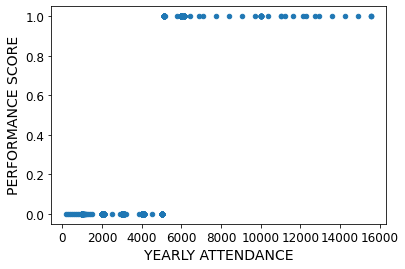

In [220]:
    members.plot(kind="scatter", x="YEARLY ATTENDANCE", y="PERFORMANCE SCORE")

<AxesSubplot:xlabel='YEARLY ATTENDANCE', ylabel='PERFORMANCE SCORE'>

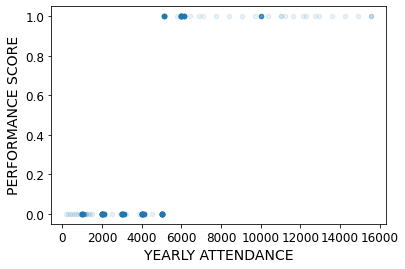

In [221]:
members.plot(kind="scatter", x="YEARLY ATTENDANCE", y="PERFORMANCE SCORE", alpha=0.1)

In [222]:
corr_matrix = members.corr()

In [223]:
corr_matrix["PERFORMANCE SCORE"].sort_values(ascending=False)

PERFORMANCE SCORE    1.00
STATUS               1.00
YEARLY ATTENDANCE    0.71
UNIQUE ID            0.46
Name: PERFORMANCE SCORE, dtype: float64

array([[<AxesSubplot:xlabel='UNIQUE ID', ylabel='UNIQUE ID'>,
        <AxesSubplot:xlabel='YEARLY ATTENDANCE', ylabel='UNIQUE ID'>,
        <AxesSubplot:xlabel='PERFORMANCE SCORE', ylabel='UNIQUE ID'>],
       [<AxesSubplot:xlabel='UNIQUE ID', ylabel='YEARLY ATTENDANCE'>,
        <AxesSubplot:xlabel='YEARLY ATTENDANCE', ylabel='YEARLY ATTENDANCE'>,
        <AxesSubplot:xlabel='PERFORMANCE SCORE', ylabel='YEARLY ATTENDANCE'>],
       [<AxesSubplot:xlabel='UNIQUE ID', ylabel='PERFORMANCE SCORE'>,
        <AxesSubplot:xlabel='YEARLY ATTENDANCE', ylabel='PERFORMANCE SCORE'>,
        <AxesSubplot:xlabel='PERFORMANCE SCORE', ylabel='PERFORMANCE SCORE'>]],
      dtype=object)

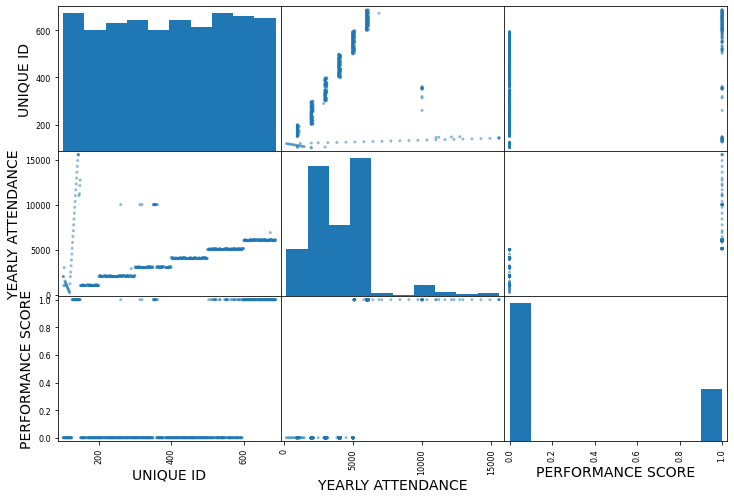

In [224]:
from pandas.plotting import scatter_matrix

attributes = ["UNIQUE ID", "YEARLY ATTENDANCE", "PERFORMANCE SCORE" ]
scatter_matrix(members[attributes], figsize=(12, 8))

(0.0, 20000.0, 0.0, 15.0)

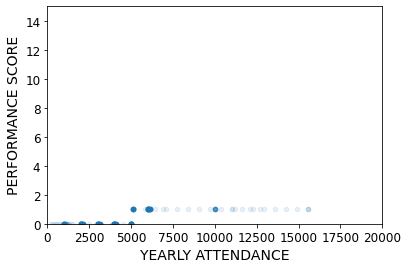

In [225]:
members.plot(kind="scatter", x="YEARLY ATTENDANCE", y="PERFORMANCE SCORE",
             alpha=0.1)
plt.axis([0, 20000, 0, 15])

In [226]:
# I am going to create a new feature for my dataset using my Yearly Attendance as a reference point
members["MONTHLY ATTENDANCE"] = members["YEARLY ATTENDANCE"]/12


In [227]:
corr_matrix = members.corr()
corr_matrix["PERFORMANCE SCORE"].sort_values(ascending=False)

PERFORMANCE SCORE     1.00
STATUS                1.00
MONTHLY ATTENDANCE    0.71
YEARLY ATTENDANCE     0.71
UNIQUE ID             0.46
Name: PERFORMANCE SCORE, dtype: float64

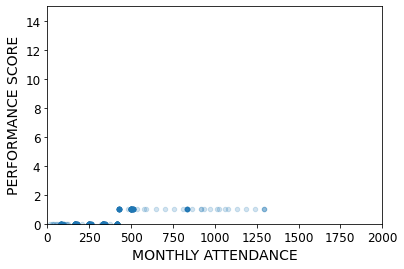

In [228]:
members.plot(kind="scatter", x="MONTHLY ATTENDANCE", y="PERFORMANCE SCORE",
             alpha=0.2)
plt.axis([0, 2000, 0, 15])
plt.show()

In [229]:
members.describe()

,UNIQUE ID,YEARLY ATTENDANCE,PERFORMANCE SCORE,STATUS,MONTHLY ATTENDANCE
count,557.00,557.00,557.00,557.00,557.00
mean,396.56,4116.94,0.27,3.46,343.08
std,171.29,2443.59,0.45,4.01,203.63
min,101.00,200.00,0.00,1.00,16.67
25%,249.00,2111.00,0.00,1.00,175.92
50%,400.00,4000.00,0.00,1.00,333.33
75%,546.00,5111.00,1.00,10.00,425.92
max,688.00,15550.00,1.00,10.00,1295.83


# PREPARING THE DATA FOR MACHINE LEARNING ALGORITHM

In [230]:
members = members.drop("MONTHLY ATTENDANCE", axis=1) 
members.head()

,UNIQUE ID,FIRST NAME,LAST NAME,GENDER,AGE,EMAIL,PHONE NUMBER,ADDRESS,BIRTHDAY,YEARLY ATTENDANCE,PERFORMANCE SCORE,STATUS
0,101,OLUWATOBI,PRINCESS OLORUNSHOLA,Female,Woman,@TOBIDOUNSHOLA1@GMAIL.COM,8080375855,"PLOT 14,PENTAGON ESTATE,RUMUOKWUSHI",27-04,2000,0,1
1,102,Abasiama,Ikpima,Female,Youth,abasiama@gmail.com,8066792966,no 15 candi eke street. Woji port harcourt,2/8/2019,2000,0,1
2,103,ADUMI,OKOLIE,Male,Man,adimaua.okolie2@gmail.com,9086573297,"YENAGOA,BAYELSA",16-08,1000,0,1
3,104,ADOILI,ADOKI,Male,Man,adoiliadoki@gmail.com,8112094704,NO 13 EWAA ST OFF ELEKAHIA ROAD.,30-10,3000,0,1
4,105,ARIEL,IKONNE,Male,Man,airelikonne@gmail.com,8118642305,IGWURUTA,12-Dec,1000,0,1


In [231]:
sample_incomplete_rows = members[members.isnull().any(axis=1)].head(10) #I want to see the first 10 missing values
sample_incomplete_rows   # display rows with missing values

,UNIQUE ID,FIRST NAME,LAST NAME,GENDER,AGE,EMAIL,PHONE NUMBER,ADDRESS,BIRTHDAY,YEARLY ATTENDANCE,PERFORMANCE SCORE,STATUS


In [232]:
print(members.isnull().sum())

UNIQUE ID            0
FIRST NAME           0
LAST NAME            0
GENDER               0
AGE                  0
EMAIL                0
PHONE NUMBER         0
ADDRESS              0
BIRTHDAY             0
YEARLY ATTENDANCE    0
PERFORMANCE SCORE    0
STATUS               0
dtype: int64


In [233]:
sample_incomplete_rows.dropna(subset=["YEARLY ATTENDANCE", "YEARLY ATTENDANCE", "PERFORMANCE SCORE"])  

,UNIQUE ID,FIRST NAME,LAST NAME,GENDER,AGE,EMAIL,PHONE NUMBER,ADDRESS,BIRTHDAY,YEARLY ATTENDANCE,PERFORMANCE SCORE,STATUS


In [234]:
members.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UNIQUE ID          557 non-null    int64 
 1   FIRST NAME         557 non-null    object
 2   LAST NAME          557 non-null    object
 3   GENDER             557 non-null    object
 4   AGE                557 non-null    object
 5   EMAIL              557 non-null    object
 6   PHONE NUMBER       557 non-null    object
 7   ADDRESS            557 non-null    object
 8   BIRTHDAY           557 non-null    object
 9   YEARLY ATTENDANCE  557 non-null    int64 
 10  PERFORMANCE SCORE  557 non-null    int64 
 11  STATUS             557 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 52.3+ KB


In [235]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["UNIQUE ID", "YEARLY ATTENDANCE"])),
        ("imputer", SimpleImputer(strategy="median")),
    ])

In [237]:
num_pipeline.fit_transform(members)

array([[ 101., 2000.],
       [ 102., 2000.],
       [ 103., 1000.],
       ...,
       [ 686., 6111.],
       [ 687., 6111.],
       [ 688., 6000.]])

In [238]:
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [239]:
from sklearn.preprocessing import OneHotEncoder

In [240]:
cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["FIRST NAME", "LAST NAME", "GENDER", "AGE", "EMAIL", "PHONE NUMBER", "ADDRESS", "BIRTHDAY"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

In [241]:
cat_pipeline.fit_transform(members)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [242]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [243]:
X_train = preprocess_pipeline.fit_transform(members)
X_train

array([[ 101., 2000.,    0., ...,    0.,    0.,    0.],
       [ 102., 2000.,    0., ...,    0.,    0.,    0.],
       [ 103., 1000.,    0., ...,    0.,    0.,    0.],
       ...,
       [ 686., 6111.,    0., ...,    0.,    0.,    0.],
       [ 687., 6111.,    0., ...,    0.,    0.,    0.],
       [ 688., 6000.,    0., ...,    0.,    0.,    0.]])

In [244]:
y_train = members["STATUS"]

In [245]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train, y_train)

SVC(gamma='auto')

In [246]:
X_test = preprocess_pipeline.transform(members)
y_pred = svm_clf.predict(X_test)

In [247]:
#for clustering

In [248]:
y_test = preprocess_pipeline.transform(members)
X_pred = svm_clf.predict(y_test)

In [249]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.958896103896104

In [250]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.9546428571428571

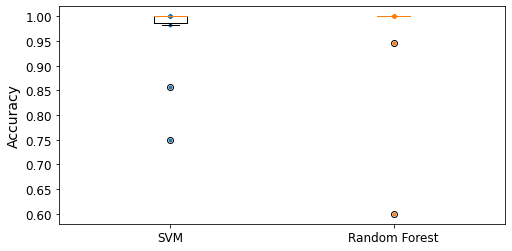

In [251]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

In [252]:
members["UNIQUE IDBucket"] = members["UNIQUE ID"] // 15 * 15
members[["UNIQUE IDBucket", "PERFORMANCE SCORE"]].groupby(['UNIQUE IDBucket']).mean()

,PERFORMANCE SCORE
UNIQUE IDBucket,
90,0.00
105,0.00
120,0.60
135,0.93
150,0.00
165,0.00
180,0.00
195,0.00
210,0.00


In [253]:
members["YEARLY ATTENDANCEBucket"] = members["YEARLY ATTENDANCE"] // 15 * 15
members[["YEARLY ATTENDANCEBucket", "PERFORMANCE SCORE"]].groupby(['YEARLY ATTENDANCEBucket']).mean()

,PERFORMANCE SCORE
YEARLY ATTENDANCEBucket,
195,0
300,0
390,0
495,0
600,0
690,0
795,0
900,0
990,0


#train a Gaussian Naive Bayes classifier on the training set

In [254]:

from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

In [255]:
#PREDICTING THE RESULTS
y_pred = gnb.predict(X_test)

y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,
        1,  1,  1,  1,  1,  1,  1,  1, 10, 10, 10, 10, 10, 10, 10, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10,  1,  1,  1,
       10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 10,  1,  1,  1,  1,
        1, 10,  1,  1,  1,  1, 10,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [256]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent
1
2
3
4
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent

In [257]:
# Example of Gaussian PDF
from math import sqrt
from math import pi
from math import exp
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Test Gaussian PDF
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

0.3989422804014327
0.24197072451914337
0.24197072451914337


In [258]:

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, count = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities

In [259]:
# Example of calculating class probabilities
from math import sqrt
from math import pi
from math import exp
 
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
	separated = dict()
	for i in range(len(dataset)):
		vector = dataset[i]
		class_value = vector[-1]
		if (class_value not in separated):
			separated[class_value] = list()
		separated[class_value].append(vector)
	return separated
 
# Calculate the mean of a list of numbers
def mean(numbers):
	return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
	avg = mean(numbers)
	variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
	return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
	summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
	del(summaries[-1])
	return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
	separated = separate_by_class(dataset)
	summaries = dict()
	for class_value, rows in separated.items():
		summaries[class_value] = summarize_dataset(rows)
	return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
	exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
	total_rows = sum([summaries[label][0][2] for label in summaries])
	probabilities = dict()
	for class_value, class_summaries in summaries.items():
		probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
		for i in range(len(class_summaries)):
			mean, stdev, _ = class_summaries[i]
			probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
	return probabilities
 
# Test calculating class probabilities
dataset = [[3.393533211,2.331273381,0],
	[3.110073483,1.781539638,0],
	[1.343808831,3.368360954,0],
	[3.582294042,4.67917911,0],
	[2.280362439,2.866990263,0],
	[7.423436942,4.696522875,1],
	[5.745051997,3.533989803,1],
	[9.172168622,2.511101045,1],
	[7.792783481,3.424088941,1],
	[7.939820817,0.791637231,1]]
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[0])
print(probabilities)

{0: 0.05032427673372076, 1: 0.00011557718379945765}


In [260]:
#import the pandas library and aliasing as pd
import pandas as pd
df = pd.DataFrame()
print (df)

Empty DataFrame
Columns: []
Index: []


# CLUSTERING STARTED

In [261]:
from sklearn import preprocessing
members_cluster = pd.read_csv("members.csv")
new_members = members_cluster[['YEARLY ATTENDANCE','PERFORMANCE SCORE']]
scaler = preprocessing.MinMaxScaler()
members_cluster[['YEARLY ATTENDANCE','PERFORMANCE SCORE']] = scaler.fit_transform(members_cluster[['YEARLY ATTENDANCE','PERFORMANCE SCORE']])

In [262]:
X_train.shape

(557, 2390)

## Reduction of dimensions

In [263]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
trainX2D = pca.fit_transform(X_train)
print(trainX2D, trainX2D.shape)

[[-2124.34679091   236.47694628]
 [-2124.31900237   235.4795275 ]
 [-3123.90307072   206.6232075 ]
 ...
 [ 2001.35329744  -233.78322072]
 [ 2001.38114757  -234.78281945]
 [ 1890.45207548  -238.87433931]] (557, 2)


## Plotting data with the new dimensions

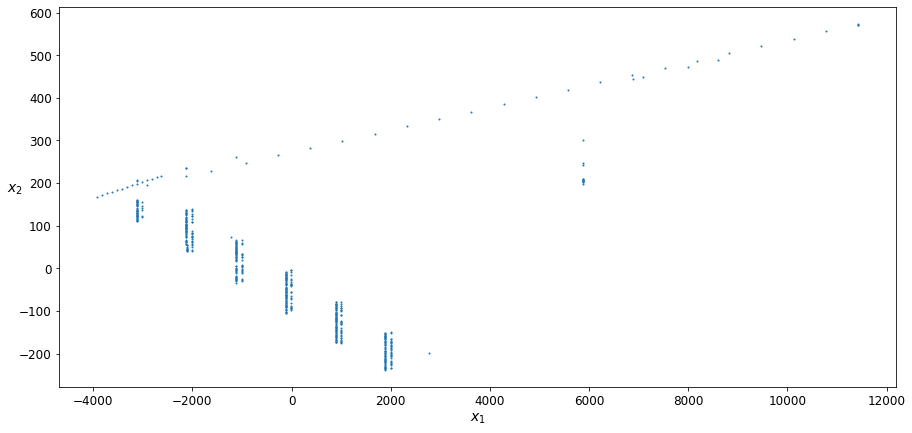

In [264]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.figure(figsize=(15, 7))
plot_clusters(trainX2D)
plt.show()

## Finding the optimal number of clusters

In [265]:
from sklearn.cluster import KMeans

kmeans_per_k = [KMeans(n_clusters=k, random_state=35).fit(trainX2D)
                for k in range(1, 5)]
inertias = [model.inertia_ for model in kmeans_per_k]

C:\Users\USER\Documents\PythonRobotics\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [266]:
inertias

[3336254519.6129494, 1508630334.2793484, 488122567.9973103, 277323166.8439021]

## WHEN REDUCED TO TWO DIMENSIONS

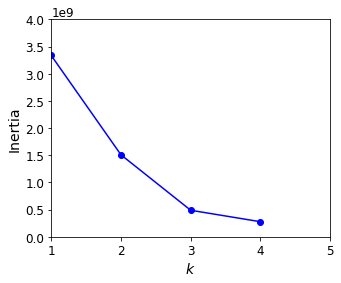

In [267]:
plt.figure(figsize=(5, 4))
plt.plot(range(1, 5), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 5, 0, 4000000000])
plt.show()

## FOR THE FULL DATASET

In [268]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train)
                for k in range(1, 5)]
inertias = [model.inertia_ for model in kmeans_per_k]
inertias

C:\Users\USER\Documents\PythonRobotics\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[3336258103.6696315, 1508633913.9517956, 488126145.5339357, 277326724.0081801]

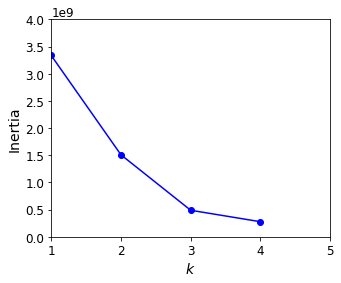

In [269]:
plt.figure(figsize=(5, 4))
plt.plot(range(1, 5), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 5, 0, 4000000000])
plt.show()

## K-MEANS ALGORITHM

### Applying K-Means Algorithm (Unsupervised)

In [270]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_kmeans2 = kmeans.fit_predict(X_train)

## Pinciple Component Analysis (PCA) for Test

In [271]:
pca2 = PCA(n_components=2)
testX2D = pca2.fit_transform(X_test)
print(testX2D, testX2D.shape)

[[-2124.34679091   236.47694628]
 [-2124.31900237   235.4795275 ]
 [-3123.90307072   206.6232075 ]
 ...
 [ 2001.35329744  -233.78322072]
 [ 2001.38114757  -234.78281945]
 [ 1890.45207548  -238.87433931]] (557, 2)


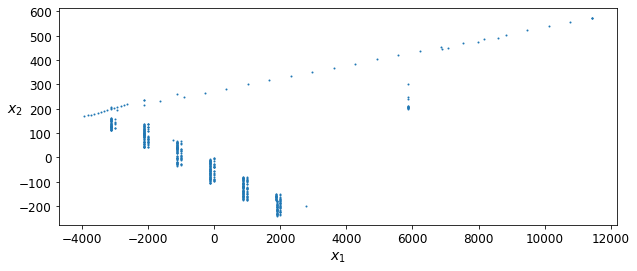

In [272]:
plt.figure(figsize=(10, 4))
plot_clusters(testX2D)
plt.show()

## Inserting boundaries

In [273]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred_kmeans = kmeans.fit_predict(trainX2D)

In [274]:
X = trainX2D
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False) 

## The decision boundary

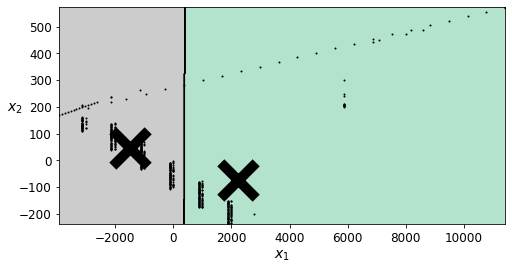

In [275]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

## Applying GMM (Beyond K-Means Algorithm)
### Using probability to assign clusters

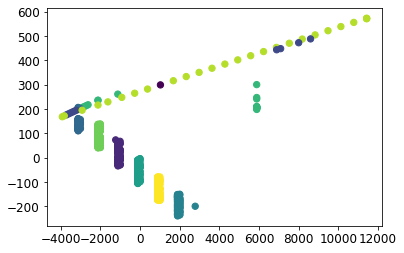

In [276]:
from sklearn.mixture import GaussianMixture as GMM
gmm = GMM(n_components = 10).fit(trainX2D)
y_predict_gmm=gmm.predict(trainX2D)
plt.scatter(trainX2D[:, 0], trainX2D[:, 1], c=y_predict_gmm, s=40)

### For test

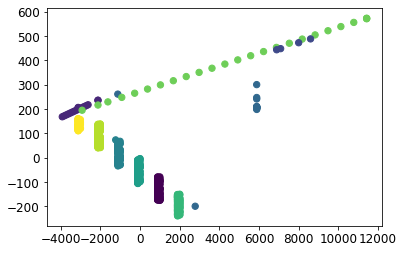

In [277]:
gmm2 = GMM(n_components = 10).fit(testX2D)
y_predict_gmm=gmm2.predict(testX2D)
plt.scatter(testX2D[:, 0], testX2D[:, 1], c=y_predict_gmm, s=40)

In [278]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
clusters = kmeans.fit_predict(new_members)
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((new_members,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

print (clusters, labels, labeledCustomers)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [279]:
print (y_train, y_train.shape)

0       1
1       1
2       1
3       1
4       1
       ..
552    10
553    10
554    10
555    10
556    10
Name: STATUS, Length: 557, dtype: int64 (557,)


In [280]:
print (y_test, y_test.shape)

[[ 101. 2000.    0. ...    0.    0.    0.]
 [ 102. 2000.    0. ...    0.    0.    0.]
 [ 103. 1000.    0. ...    0.    0.    0.]
 ...
 [ 686. 6111.    0. ...    0.    0.    0.]
 [ 687. 6111.    0. ...    0.    0.    0.]
 [ 688. 6000.    0. ...    0.    0.    0.]] (557, 2390)


# MORE ANALYSIS OF DATASET

In [281]:
# Displaying the categorical data in the attribute
members["GENDER"].value_counts()

Male      323
Female    234
Name: GENDER, dtype: int64

# Supervised Learning (Decision Tree)

In [282]:
# Load libraries
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score

In [283]:
from sklearn.model_selection import train_test_split

col = ['UNIQUE ID','YEARLY ATTENDANCE','PERFORMANCE SCORE','STATUS']
target = members['STATUS']
inputs = members[col]

X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size = 100, random_state = 20)

In [284]:
X_train

,UNIQUE ID,YEARLY ATTENDANCE,PERFORMANCE SCORE,STATUS
459,588,5111,1,10
248,363,3111,0,1
392,521,5111,1,10
121,230,2000,0,1
350,477,4111,0,1
...,...,...,...,...
218,332,3000,0,1
223,337,3000,0,1
271,392,3000,0,1
474,603,6000,1,10


In [285]:
X_test

,UNIQUE ID,YEARLY ATTENDANCE,PERFORMANCE SCORE,STATUS
147,257,2111,0,1
407,536,5000,0,1
94,199,1000,0,1
119,228,2000,0,1
230,344,3000,0,1
...,...,...,...,...
319,442,4000,0,1
502,632,6111,1,10
13,114,700,0,1
24,125,4500,0,1


In [286]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  1.0
Training Accuracy:  1.0


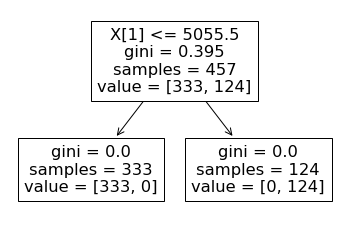

In [287]:
plot_tree(decision_tree);

In [288]:
!pip install graphviz

In [289]:
!pip install pydotplus

In [290]:
import os  
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin'

In [291]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

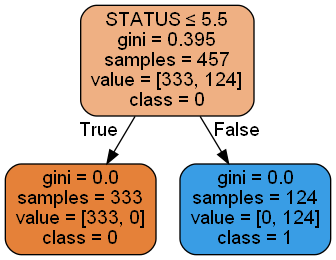

In [292]:
from sklearn.tree import export_graphviz
from six import StringIO 
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('members.png')
Image(graph.create_png())

# 10 fold cross-validation

In [293]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, X_train, y_train, cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [294]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [295]:
# Precision measure
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, pred)

1.0

In [296]:
# Recall score
recall_score(y_test, pred)

1.0

In [297]:
# F measure
from sklearn.metrics import f1_score

f1_score(y_test, pred)

1.0

In [298]:
# ROC area
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred)
roc_auc

1.0

# Parameters being changed

In [299]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=4, splitter="best", min_samples_leaf=2)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  1.0
Training Accuracy:  1.0


In [300]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=7, splitter="random", min_samples_leaf=3)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  1.0
Training Accuracy:  1.0


In [301]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=9, splitter="best", min_samples_leaf=4)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  1.0
Training Accuracy:  1.0


In [302]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=8, splitter="random", min_samples_leaf=2)
decision_tree.fit(X_train, y_train)
pred = decision_tree.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  1.0
Training Accuracy:  1.0


# 30% for testing

In [303]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs, target, test_size = 0.30, random_state = 42)

In [304]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(X_train2, y_train2)
pred2 = decision_tree.predict(X_test2)
predx2 = decision_tree.predict(X_train2)
print("Testing Accuracy: ",accuracy_score(y_test2, pred2))
print("Training Accuracy: ",accuracy_score(y_train2,predx2))

Testing Accuracy:  1.0
Training Accuracy:  1.0


# 80% for testing

In [305]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs, target, test_size = 0.80, random_state = 42)

In [306]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
decision_tree.fit(X_train2, y_train2)
pred2 = decision_tree.predict(X_test2)
predx2 = decision_tree.predict(X_train2)
print("Testing Accuracy: ",accuracy_score(y_test2, pred2))
print("Training Accuracy: ",accuracy_score(y_train2,predx2))

Testing Accuracy:  1.0
Training Accuracy:  1.0


# Random Forest

In [307]:
from sklearn.ensemble import RandomForestClassifier

Random_clf = RandomForestClassifier(max_depth=2, random_state=0)
Random_clf.fit(X_train, y_train)
pred2 = Random_clf.predict(X_test)
predx = decision_tree.predict(X_train)
print("Testing Accuracy: ",accuracy_score(y_test, pred2))
print("Training Accuracy: ",accuracy_score(y_train,predx))

Testing Accuracy:  1.0
Training Accuracy:  1.0


In [308]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(Random_clf, X_train, y_train, cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [309]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [310]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_test, pred2)

1.0

In [311]:
recall_score(y_test, pred2)

1.0

In [312]:
from sklearn.metrics import f1_score

f1_score(y_test, pred2)

1.0

In [313]:
# ROC area
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, pred2)
roc_auc

1.0

In [314]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs, target, test_size = 0.30, random_state = 42)

In [315]:
Random_clf = RandomForestClassifier(max_depth=2, random_state=0)
Random_clf.fit(X_train, y_train)
pred2 = Random_clf.predict(X_test2)
predx2 = Random_clf.predict(X_train2)
print("Testing Accuracy: ",accuracy_score(y_test2, pred2))
print("Training Accuracy: ",accuracy_score(y_train2,predx2))

Testing Accuracy:  1.0
Training Accuracy:  1.0


In [316]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs, target, test_size = 0.80, random_state = 42)

In [317]:
Random_clf = RandomForestClassifier(max_depth=2, random_state=0)
Random_clf.fit(X_train, y_train)
pred2 = Random_clf.predict(X_test2)
predx2 = Random_clf.predict(X_train2)
print("Testing Accuracy: ",accuracy_score(y_test2, pred2))
print("Training Accuracy: ",accuracy_score(y_train2,predx2))

Testing Accuracy:  1.0
Training Accuracy:  1.0


# Cross validation

In [318]:
from sklearn.model_selection import KFold

In [319]:
kfold = KFold(10)

# KFold for both Train and Test

In [320]:
# enumerate splits
for train, test in kfold.split(members):
 print('train: %s, test: %s' % (train, test))

train: [ 56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300

# KFold for only Train Set

In [321]:
# enumerate splits
for train, test in kfold.split(members):
 print('X_train: %s, y_train: %s' % (X_train, y_train))

X_train:      UNIQUE ID  YEARLY ATTENDANCE  PERFORMANCE SCORE  STATUS
459        588               5111                  1      10
248        363               3111                  0       1
392        521               5111                  1      10
121        230               2000                  0       1
350        477               4111                  0       1
..         ...                ...                ...     ...
218        332               3000                  0       1
223        337               3000                  0       1
271        392               3000                  0       1
474        603               6000                  1      10
355        482               4000                  0       1

[457 rows x 4 columns], y_train: 459    10
248     1
392    10
121     1
350     1
       ..
218     1
223     1
271     1
474    10
355     1
Name: STATUS, Length: 457, dtype: int64
X_train:      UNIQUE ID  YEARLY ATTENDANCE  PERFORMANCE SCORE  STATUS
459  

In [357]:

# scikit-learn k-fold cross-validation
from numpy import array
# data sample
members = array(members)
# prepare cross validation
kfold = KFold(10)
# enumerate splits
for train, test in kfold.split(members):
 print('train: %s, test: %s' % (members[train], members[test]))

train: [[157 'Prince' 'Ephraim' ... 1 150 990]
 [158 'ERNEST' 'OJUKWU' ... 1 150 990]
 [159 'JIM' 'ETIMBUK GOODNESS' ... 1 150 990]
 ...
 [686 'UGO' 'VICTORIA' ... 10 675 6105]
 [687 'RUKKY' 'Empty' ... 10 675 6105]
 [688 'UYIME' 'ENO' ... 10 675 6000]], test: [[101 'OLUWATOBI' 'PRINCESS OLORUNSHOLA' 'Female' 'Woman'
  '@TOBIDOUNSHOLA1@GMAIL.COM' '8080375855'
  'PLOT 14,PENTAGON ESTATE,RUMUOKWUSHI' '27-04' 2000 0 1 90 1995]
 [102 'Abasiama' 'Ikpima' 'Female' 'Youth' 'abasiama@gmail.com'
  '8066792966' 'no 15 candi eke street. Woji port harcourt' '2/8/2019'
  2000 0 1 90 1995]
 [103 'ADUMI' 'OKOLIE' 'Male' 'Man' 'adimaua.okolie2@gmail.com'
  '9086573297' 'YENAGOA,BAYELSA' '16-08' 1000 0 1 90 990]
 [104 'ADOILI' 'ADOKI' 'Male' 'Man' 'adoiliadoki@gmail.com' '8112094704'
  'NO 13  EWAA ST OFF ELEKAHIA ROAD.' '30-10' 3000 0 1 90 3000]
 [105 'ARIEL' 'IKONNE' 'Male' 'Man' 'airelikonne@gmail.com' '8118642305'
  'IGWURUTA' '12-Dec' 1000 0 1 105 990]
 [106 'AJAYI' 'ADEYEMI' 'Male' 'Man' 'AJAYIAD

In [323]:
training_data, testing_data = train_test_split(members, test_size=0.4, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

# No. of training examples: 120
# No. of testing examples: 30

No. of training examples: 334
No. of testing examples: 223


# LINEAR CLASSIFIER

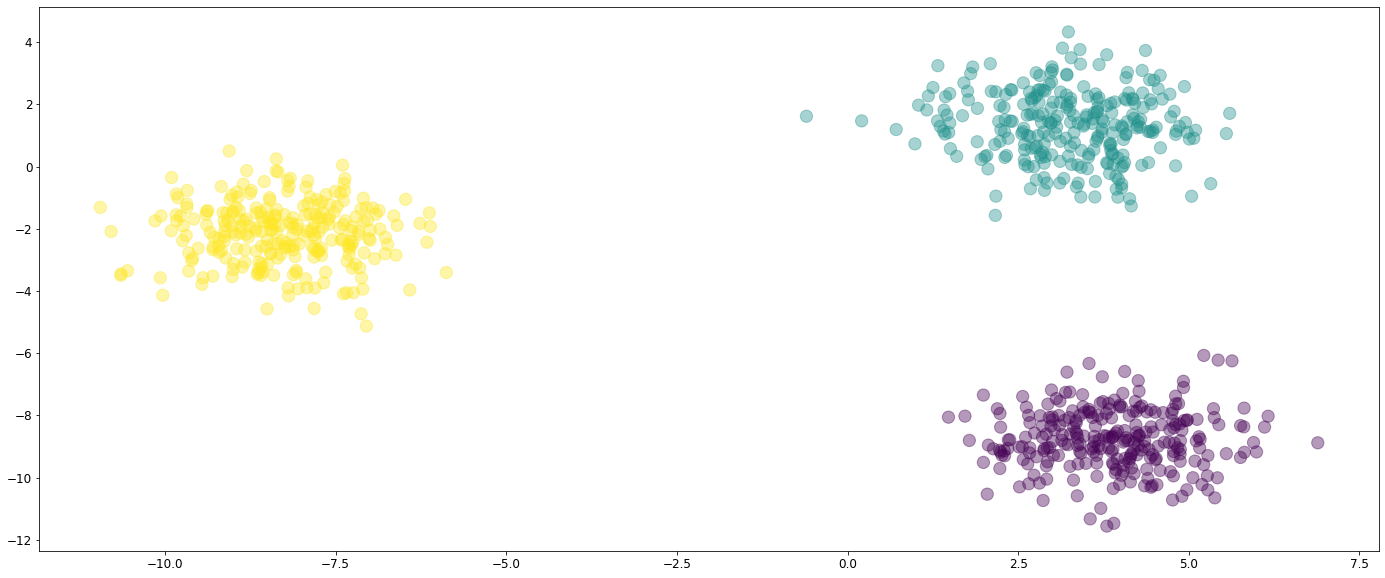

In [324]:
from sklearn.datasets import make_blobs

X_values, y_flat = make_blobs(n_features=2, n_samples=800, centers=3, random_state=500)
y = OneHotEncoder().fit_transform(y_flat.reshape(-1, 1)).todense()
y = np.array(y)

%matplotlib inline

from matplotlib import pyplot as plt

# Optional line: Sets a default figure size to be a bit larger.
plt.rcParams['figure.figsize'] = (24, 10)

plt.scatter(X_values[:,0], X_values[:,1], c=y_flat, alpha=0.4, s=150)

In [325]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, y_train_flat, y_test_flat = train_test_split(X_values, y, y_flat)

X_test += np.random.randn(*X_test.shape) * 1.5

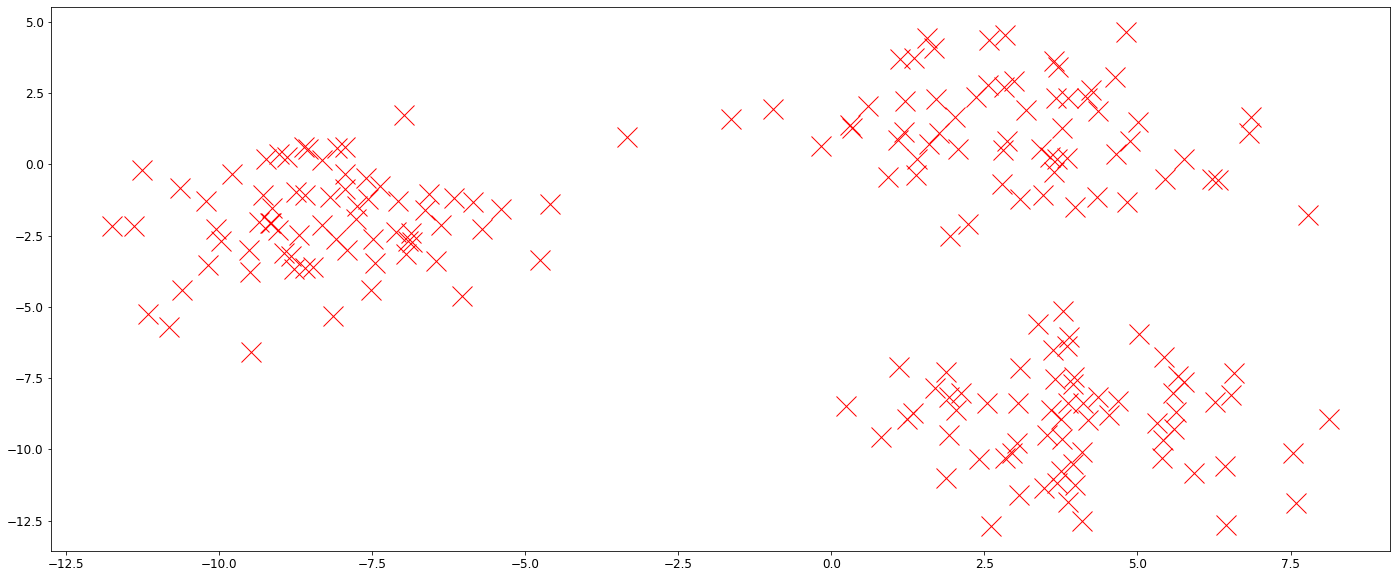

In [326]:
#plt.scatter(X_train[:,0], X_train[:,1], c=y_train_flat, alpha=0.3, s=150)
plt.plot(X_test[:,0], X_test[:,1], 'rx', markersize=20)

### CREATING A MODEL

In [327]:
import tensorflow as tf

print(tf.__version__)

2.7.0


In [328]:
conda upgrade tf_upgrade_v2 -h


usage: conda-script.py upgrade [-h] [-n ENVIRONMENT | -p PATH] [-c CHANNEL]
                               [--use-local] [--override-channels]
                               [--repodata-fn REPODATA_FNS]
                               [--strict-channel-priority]
                               [--no-channel-priority]
                               [--no-deps | --only-deps] [--no-pin] [--copy]
                               [--no-shortcuts] [-C] [-k] [--offline] [-d]
                               [--json] [-q] [-v] [-y] [--download-only]
                               [--show-channel-urls] [--file FILE]
                               [--force-reinstall]
                               [--freeze-installed | --update-deps | -S | --update-all | --update-specs]
                               [--clobber]
                               [package_spec [package_spec ...]]

Alias for conda update.

Options:

positional arguments:
  package_spec          Packages to install or update in the conda
  

In [329]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

n_features = X_values.shape[1]
n_classes = len(set(y_flat))

weights_shape = (n_features, n_classes)

W = tf.Variable(dtype=tf.float32, initial_value=tf.random.normal(weights_shape)) # Weights of the model

X = tf.placeholder(dtype=tf.float32)

Y_true = tf.placeholder(dtype=tf.float32)

bias_shape = (1, n_classes)
b = tf.Variable(dtype=tf.float32, initial_value=tf.random_normal(bias_shape))

Y_pred = tf.matmul(X, W) + b

In [330]:
loss_function = tf.losses.softmax_cross_entropy(Y_true, Y_pred)

In [331]:
learner = tf.train.GradientDescentOptimizer(0.1).minimize(loss_function)

In [332]:
with tf.Session() as sess:
 sess.run(tf.global_variables_initializer())
 for i in range(5000):
  result = sess.run(learner, {X: X_train, Y_true: y_train})
 if i % 100 == 0:
  print("Iteration {}:\tLoss={:.6f}".format(i, sess.run(loss_function, {X: X_test, Y_true: y_test})))
  y_pred = sess.run(Y_pred, {X: X_test})
 W_final, b_final = sess.run([W, b])

In [333]:
predicted_y_values = np.argmax(y_pred)
predicted_y_values

10

In [334]:
h = 1
x_min, x_max = X_values[:, 0].min() - 2 * h, X_values[:, 0].max() + 2 * h
y_min, y_max = X_values[:, 1].min() - 2 * h, X_values[:, 1].max() + 2 * h
x_0, x_1 = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
decision_points = np.c_[x_0.ravel(), x_1.ravel()]

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 200.

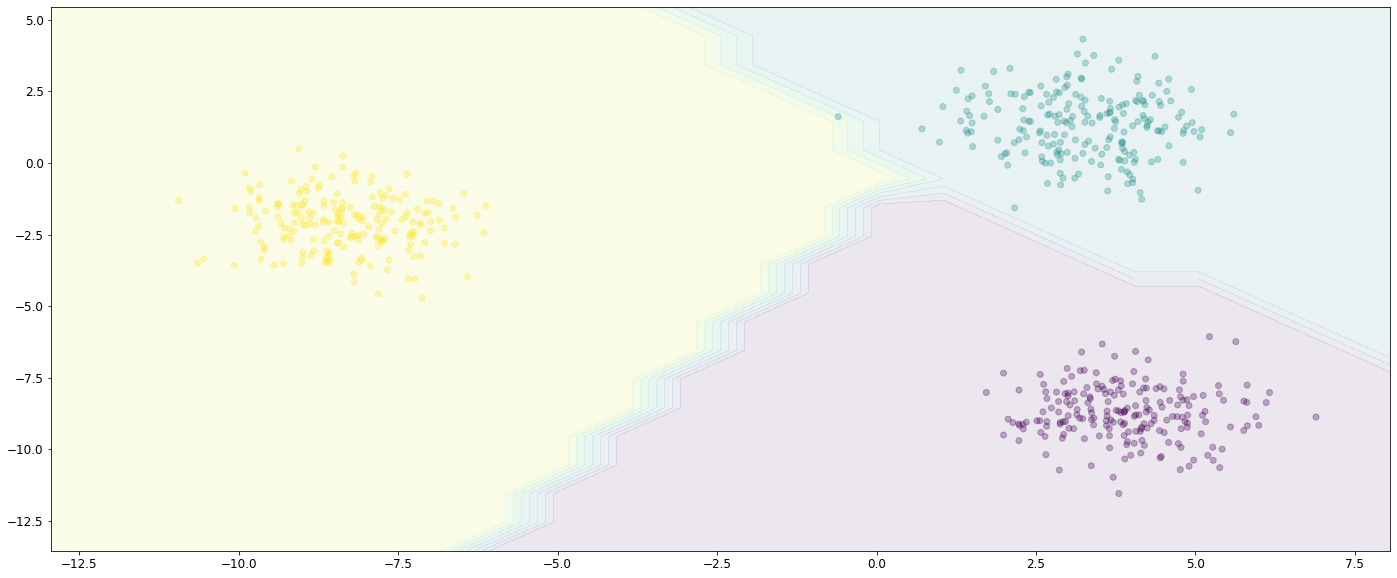

In [335]:
# We recreate our model in NumPy
Z = np.argmax(decision_points @ W_final[[0,1]] + b_final, axis=1)

# Create a contour plot of the x_0 and x_1 values
Z = Z.reshape(x_0.shape)
plt.contourf(x_0, x_1, Z, alpha=0.1)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train_flat, alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=predicted_y_values, marker='x', s=200)

plt.xlim(x_0.min(), x_0.max())
plt.ylim(x_1.min(), x_1.max())

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 200.

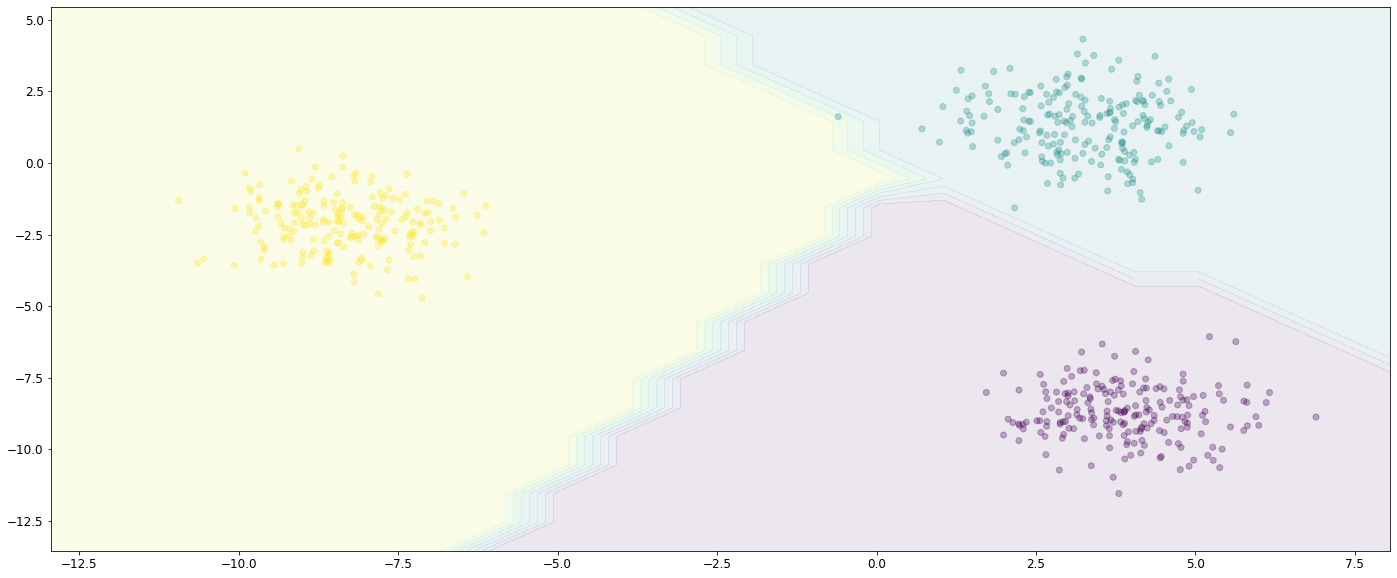

In [336]:
# We recreate our model in NumPy
Z = np.argmax(decision_points @ W_final[[0,1]] + b_final, axis=1)

# Create a contour plot of the x_0 and x_1 values
Z = Z.reshape(x_1.shape)
plt.contourf(x_0, x_1, Z, alpha=0.1)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train_flat, alpha=0.3)
plt.scatter(X_test[:,0], X_test[:,1], c=predicted_y_values, marker='x', s=200)

plt.xlim(x_0.min(), x_0.max())
plt.ylim(x_1.min(), x_1.max())

In [337]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
print("Testing Accuracy: ",accuracy_score(y_test2, pred2))
print("Training Accuracy: ",accuracy_score(y_train2,predx2))

Testing Accuracy:  1.0
Training Accuracy:  1.0


# Using 10 fold cross validation

In [338]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, X_train, y_train, cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [339]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [340]:
# ROC area
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_train, X_train)
roc_auc

0.912956275887171

In [341]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree, X_test, y_test, cv=10)
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [342]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

1.00 accuracy with a standard deviation of 0.00


In [343]:
# ROC area
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, X_test)
roc_auc

0.8920063198715558

# MULTILAYER PERCEPTRON

In [344]:
from sklearn.base import BaseEstimator, ClassifierMixin, RegressorMixin
import random

class MultiLayerPerceptron(BaseEstimator, ClassifierMixin): 
    def __init__(self, params=None):     
        if (params == None):
            self.inputLayer = 4                       # Input Layer
            self.hiddenLayer = 5                       # Hidden Layer
            self.outputLayer = 3                       # Outpuy Layer
            self.learningRate = 0.005                  # Learning rate
            self.max_epochs = 600                      # Epochs
            self.iasHiddenValue = -1                   # Bias HiddenLayer
            self.BiasOutputValue = -1                  # Bias OutputLayer
            self.activation = self.ativacao['sigmoid'] # Activation function
            self.deriv = self.derivada['sigmoid']
        else:
            self.inputLayer = params['InputLayer']
            self.hiddenLayer = params['HiddenLayer']
            self.OutputLayer = params['OutputLayer']
            self.learningRate = params['LearningRate']
            self.max_epochs = params['Epocas']
            self.BiasHiddenValue = params['BiasHiddenValue']
            self.BiasOutputValue = params['BiasOutputValue']
            self.activation = self.ativacao[params['ActivationFunction']]
            self.deriv = self.derivada[params['ActivationFunction']]
        
        'Starting Bias and Weights'
        self.WEIGHT_hidden = self.starting_weights(self.hiddenLayer, self.inputLayer)
        self.WEIGHT_output = self.starting_weights(self.OutputLayer, self.hiddenLayer)
        self.BIAS_hidden = np.array([self.BiasHiddenValue for i in range(self.hiddenLayer)])
        self.BIAS_output = np.array([self.BiasOutputValue for i in range(self.OutputLayer)])
        self.classes_number = 3 
        
    pass
    
    def starting_weights(self, x, y):
        return [[2  * random.random() - 1 for i in range(x)] for j in range(y)]

    ativacao = {
         'sigmoid': (lambda x: 1/(1 + np.exp(-x))),
            'tanh': (lambda x: np.tanh(x)),
            'Relu': (lambda x: x*(x > 0)),
               }
    derivada = {
         'sigmoid': (lambda x: x*(1-x)),
            'tanh': (lambda x: 1-x**2),
            'Relu': (lambda x: 1 * (x>0))
               }
 
    def Backpropagation_Algorithm(self, x):
        DELTA_output = []
        'Stage 1 - Error: OutputLayer'
        ERROR_output = self.output - self.OUTPUT_L2
        DELTA_output = ((-1)*(ERROR_output) * self.deriv(self.OUTPUT_L2))
        
        arrayStore = []
        'Stage 2 - Update weights OutputLayer and HiddenLayer'
        for i in range(self.hiddenLayer):
            for j in range(self.OutputLayer):
                self.WEIGHT_output[i][j] -= (self.learningRate * (DELTA_output[j] * self.OUTPUT_L1[i]))
                self.BIAS_output[j] -= (self.learningRate * DELTA_output[j])
      
        'Stage 3 - Error: HiddenLayer'
        delta_hidden = np.matmul(self.WEIGHT_output, DELTA_output)* self.deriv(self.OUTPUT_L1)
 
        'Stage 4 - Update weights HiddenLayer and InputLayer(x)'
        for i in range(self.OutputLayer):
            for j in range(self.hiddenLayer):
                self.WEIGHT_hidden[i][j] -= (self.learningRate * (delta_hidden[j] * x[i]))
                self.BIAS_hidden[j] -= (self.learningRate * delta_hidden[j])
                
    def show_err_graphic(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro, "m-",color="b", marker=11)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimization")
        plt.show()

    def predict(self, X, y):
        'Returns the predictions for every element of X'
        my_predictions = []
        'Forward Propagation'
        forward = np.matmul(X,self.WEIGHT_hidden) + self.BIAS_hidden
        forward = np.matmul(forward, self.WEIGHT_output) + self.BIAS_output
                                 
        for i in forward:
            my_predictions.append(max(enumerate(i), key=lambda x:x[1])[0])
            
        array_score = []
        for i in range(len(my_predictions)):
            if my_predictions[i] == 0: 
                array_score.append([i, '0', my_predictions[i], y[i]])
            elif my_predictions[i] == 1:
                 array_score.append([i, '1', my_predictions[i], y[i]])
          #  elif my_predictions[i] == 2:
             #    array_score.append([i, 'Iris-virginica', my_predictions[i], y[i]])
                    
        dataframe = pd.DataFrame(array_score, columns=['_id', 'class', 'output', 'hoped_output'])
        return my_predictions, dataframe

    def fit(self, X, y):  
        count_epoch = 1
        total_error = 0
        n = len(X); 
        epoch_array = []
        error_array = []
        W0 = []
        W1 = []
        while(count_epoch <= self.max_epochs):
            for idx,inputs in enumerate(X): 
                self.output = np.zeros(self.classes_number)
                'Stage 1 - (Forward Propagation)'
                self.OUTPUT_L1 = self.activation((np.dot(inputs, self.WEIGHT_hidden) + self.BIAS_hidden.T))
                self.OUTPUT_L2 = self.activation((np.dot(self.OUTPUT_L1, self.WEIGHT_output) + self.BIAS_output.T))
                'Stage 2 - One-Hot-Encoding'
                if(y[idx] == 0): 
                    self.output = np.array([1,0,0]) #Class1 {1,0,0}
                elif(y[idx] == 1):
                    self.output = np.array([0,1,0]) #Class2 {0,1,0}
               # elif(y[idx] == 2):
                 #   self.output = np.array([0,0,1]) #Class3 {0,0,1}
                
                square_error = 0
                for i in range(self.OutputLayer):
                    erro = (self.output[i] - self.OUTPUT_L2[i])**2
                    square_error = (square_error + (0.05 * erro))
                    total_error = total_error + square_error
         
                'Backpropagation : Update Weights'
                self.Backpropagation_Algorithm(inputs)
                
            total_error = (total_error / n)
            if((count_epoch % 50 == 0)or(count_epoch == 1)):
                print("Epoch ", count_epoch, "- Total Error: ",total_error)
                error_array.append(total_error)
                epoch_array.append(count_epoch)
                
            W0.append(self.WEIGHT_hidden)
            W1.append(self.WEIGHT_output)
             
                
            count_epoch += 1
        self.show_err_graphic(error_array,epoch_array)
        
        plt.plot(W0[0])
        plt.title('Weight Hidden update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3', 'neuron4', 'neuron5'])
        plt.ylabel('Value Weight')
        plt.show()
        
        plt.plot(W1[0])
        plt.title('Weight Output update during training')
        plt.legend(['neuron1', 'neuron2', 'neuron3'])
        plt.ylabel('Value Weight')
        plt.show()

        return self

In [345]:
def show_test():
    ep1 = [0,100,200,300,400,500,600,700,800,900,1000,1500,2000]
    h_5 = [0,60,70,70,83.3,93.3,96.7,86.7,86.7,76.7,73.3,66.7,66.7]
    h_4 = [0,40,70,63.3,66.7,70,70,70,70,66.7,66.7,43.3,33.3]
    h_3 = [0,46.7,76.7,80,76.7,76.7,76.6,73.3,73.3,73.3,73.3,76.7,76.7]
    plt.figure(figsize=(10,4))
    l1, = plt.plot(ep1, h_3, "--",color='b',label="node-3", marker=11)
    l2, = plt.plot(ep1, h_4, "--",color='g',label="node-4", marker=8)
    l3, = plt.plot(ep1, h_5, "--",color='r',label="node-5", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("number of Epochs")
    plt.ylabel("% Hits")
    plt.title("Number of Hidden Layers - Performance")
    
    ep2 = [0,100,200,300,400,500,600,700]
    tanh = [0.18,0.027,0.025,0.022,0.0068,0.0060,0.0057,0.00561]
    sigm = [0.185,0.0897,0.060,0.0396,0.0343,0.0314,0.0296,0.0281]
    Relu = [0.185,0.05141,0.05130,0.05127,0.05124,0.05123,0.05122,0.05121]
    plt.figure(figsize=(10,4))
    l1 , = plt.plot(ep2, tanh, "--",color='b',label="Hyperbolic Tangent",marker=11)
    l2 , = plt.plot(ep2, sigm, "--",color='g',label="Sigmoide", marker=8)
    l3 , = plt.plot(ep2, Relu, "--",color='r',label="ReLu", marker=5)
    plt.legend(handles=[l1,l2,l3], loc=1)
    plt.xlabel("Epoch")
    plt.ylabel("Error")
    plt.title("Activation Functions - Performance")
    
    fig, ax = plt.subplots()
    names = ["Hyperbolic Tangent","Sigmoide","ReLU"]
    x1 = [2.0,4.0,6.0]
    plt.bar(x1[0], 53.4,0.4,color='b')
    plt.bar(x1[1], 96.7,0.4,color='g')
    plt.bar(x1[2], 33.2,0.4,color='r')
    plt.xticks(x1,names)
    plt.ylabel('% Hits')
    plt.title('Hits - Activation Functions')
    plt.show()

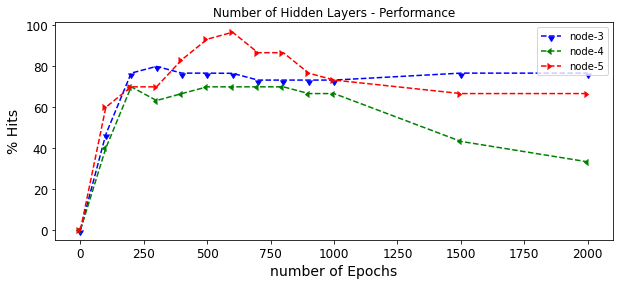

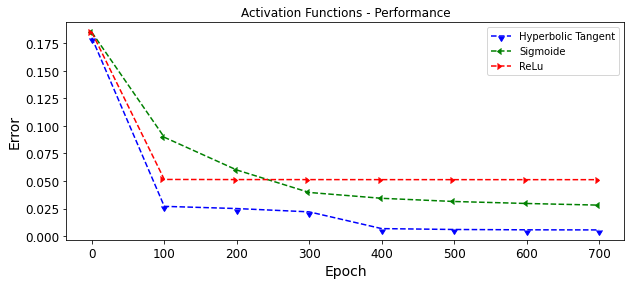

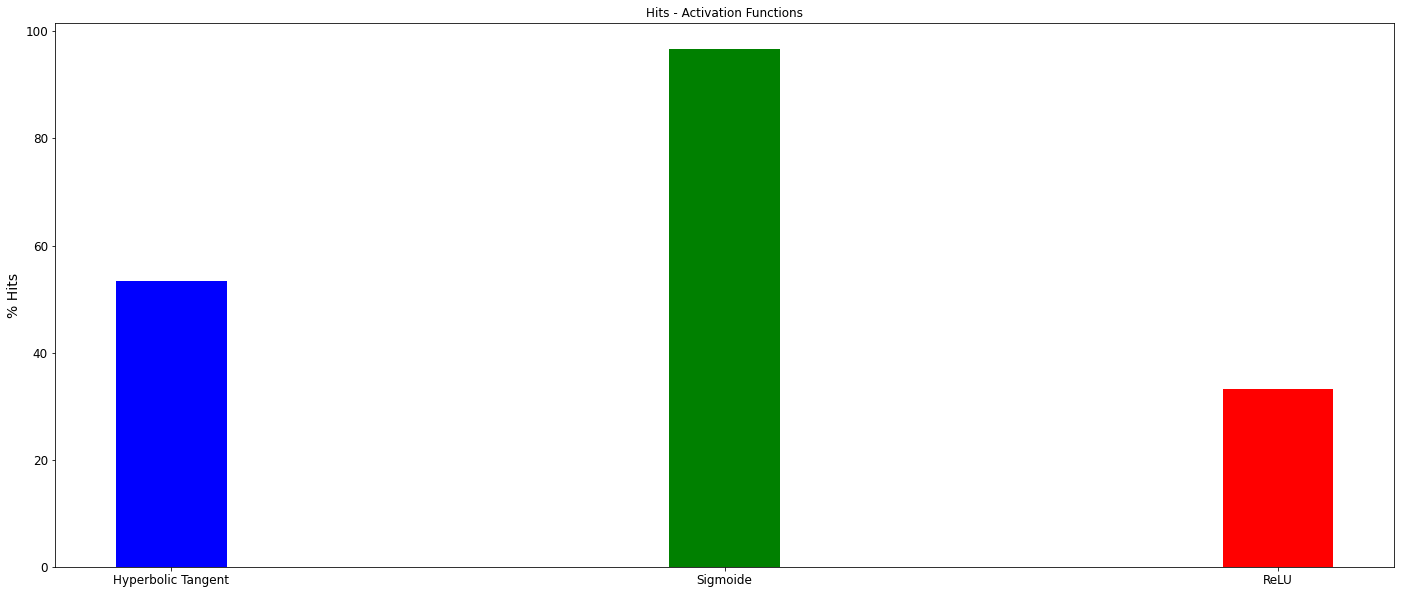

In [346]:
show_test()

In [347]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Configuration options
feature_vector_length = 784
num_classes = 10

# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 28 x 28 pixels = 784 features
X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (784,)


In [348]:

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=10, batch_size=250, verbose=1, validation_split=0.2)

# Test the model after training
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
47250/48000 [============================>.] - ETA: 0s - loss: 0.3966 - acc: 0.8891

C:\Users\USER\Documents\PythonRobotics\lib\site-packages\keras\engine\training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


48000/48000 [==============================] - 3s 60us/sample - loss: 0.3936 - acc: 0.8897 - val_loss: 0.1901 - val_acc: 0.9458
Epoch 2/10
48000/48000 [==============================] - 2s 41us/sample - loss: 0.1459 - acc: 0.9578 - val_loss: 0.1321 - val_acc: 0.9611
Epoch 3/10
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0977 - acc: 0.9724 - val_loss: 0.1034 - val_acc: 0.9699
Epoch 4/10
48000/48000 [==============================] - 2s 39us/sample - loss: 0.0715 - acc: 0.9792 - val_loss: 0.0913 - val_acc: 0.9724
Epoch 5/10
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0537 - acc: 0.9847 - val_loss: 0.0844 - val_acc: 0.9733
Epoch 6/10
48000/48000 [==============================] - 2s 41us/sample - loss: 0.0415 - acc: 0.9882 - val_loss: 0.0997 - val_acc: 0.9682
Epoch 7/10
48000/48000 [==============================] - 2s 43us/sample - loss: 0.0336 - acc: 0.9905 - val_loss: 0.0837 - val_acc: 0.9750
Epoch 8/10
48000/48000 [==============

In [349]:
# Imports
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

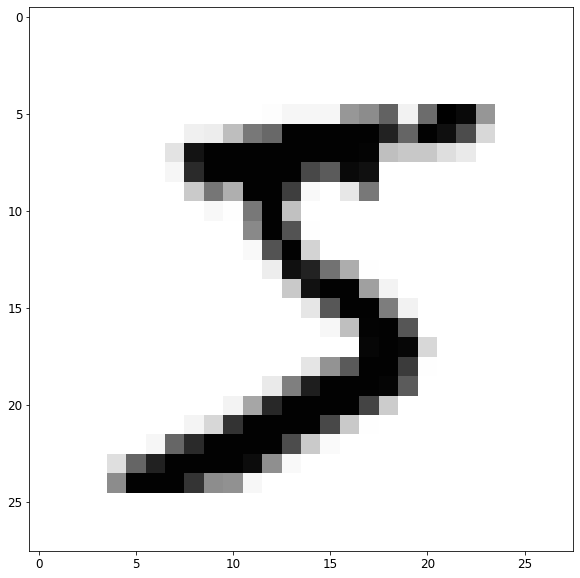

In [350]:
# Load the data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# Visualize one sample
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [351]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dense(350, input_shape=input_shape, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Feature shape: (784,)


# Training the Artificial Neural Network(MLP)

In [352]:
!pip3 install --upgrade tensorflow

# RESEARCH PROBLEM

The major problem being noticed during my poto-foloio is the many cardinality (categories) which seemed like an isssue with building an effective model
which can result in datasets which are imbalanced and affect the accuracy of the result.

I majorly noticed this problem when I was carrying out the supervised learning, where I got all accuracies as 1 even using a 10 fold cross validation.


To handle this problem, I think a tree based algorithm like a decision tree works best. This is because at every specific class split the best variable at the moment will be taken. And this is carried out based on the splitted branches/nodes impure and irregular values. An example is seen when i used the Random Forest Classifer above.

Another potential problem is that strong correlations between different potential input variables improve the statistics of the model, but may select variables that  are not causal to the outcome of interest. Using a decision tree model to describe research results has the following advantages: 
 1. Easily handle highly skewed data without having to resort to data transformation. 
 2. Decision trees are powerful statistical tools for classifying, predicting, interpreting and processing data, and have several potential applications in medical research. Simplify the complex relationship between the input variable and the target variable by dividing the original input variable into meaningful subgroups. Therefore, care must be taken when interpreting decision tree models and when developing causal hypotheses using the results of these models. 
 3. Easily handle missing values without relying on imputation. 
 4. Nonparametric approach without distribution assumptions. [1]
 
Another problem with using categorical datasets I encountered is the fact that most algorithms (or ML libraries) work better  with numeric variables. In Python, the sklearn library  requires a numeric array function. See the errors i keep getting when working with categorical data:- "ValueError:could not convert string to float". 

I  applied a random forest to my members dataset using the sklearn library  (only seven characteristics are used as independent variables). An error was returned  because the seven attributes is a category and has not been converted to a numeric format.[2]
 
 
 References
 1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4466856/
 2. https://www.analyticsvidhya.com/blog/2015/11/easy-methods-deal-categorical-variables-predictive-modeling/